In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D,BatchNormalization,MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger
import tensorflow as tf
import pickle
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
datagen= ImageDataGenerator(rescale=1./255)

In [27]:
train=datagen.flow_from_directory('/content/drive/MyDrive/AI in Healthcare/BC_DataSet/train',target_size=(224,224), class_mode='binary', batch_size=64)
val=datagen.flow_from_directory('/content/drive/MyDrive/AI in Healthcare/BC_DataSet/val',target_size=(224,224), class_mode='binary',batch_size=64)
test=datagen.flow_from_directory('/content/drive/MyDrive/AI in Healthcare/BC_DataSet/test',target_size=(224,224), class_mode='binary',batch_size=64)


Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [28]:
imgs, labels=next(train)

In [29]:
imgs.shape

(20, 224, 224, 3)

In [30]:
train.class_indices

{'Benign': 0, 'Malignant': 1}

0.0


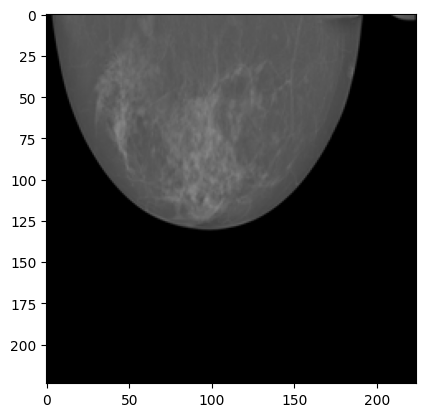

In [31]:
plt.imshow(imgs[0])
print(labels[0])

In [32]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(224,224,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,954,337 (45.60 MB)

 Trainable params: 11,954,337 (45.60 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
STEP_SIZE_TRAIN=train.n // train.batch_size
STEP_SIZE_VAL=val.n // val.batch_size

In [35]:
history=model.fit(train,
                  steps_per_epoch=STEP_SIZE_TRAIN,
                  validation_data=test,
                  validation_steps=STEP_SIZE_VAL,
                  epochs=25,
                  callbacks=[csv_logger])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6500 - loss: 0.6801 - val_accuracy: 0.4500 - val_loss: 3.1705
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 2.7104 - val_accuracy: 0.5000 - val_loss: 1.8555
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5500 - loss: 1.2326 - val_accuracy: 0.5500 - val_loss: 1.0983
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.8875 - val_accuracy: 0.4500 - val_loss: 0.9113
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.5149 - val_accuracy: 0.4500 - val_loss: 0.9541
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 0.3692 - val_accuracy: 0.4500 - val_loss: 1.0696
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9000 - loss: 0.3289 - val_accuracy: 0.4500 - val_loss: 1.1717
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9000 - loss: 0.3463 - val_accuracy: 0.3500 - val_loss: 1.2194
Epoch 9/25
1/1 ━━━━━━━━━━━━

In [36]:
model.save('/content/drive/MyDrive/AI in Healthcare/BC_DataSet/model.h5')

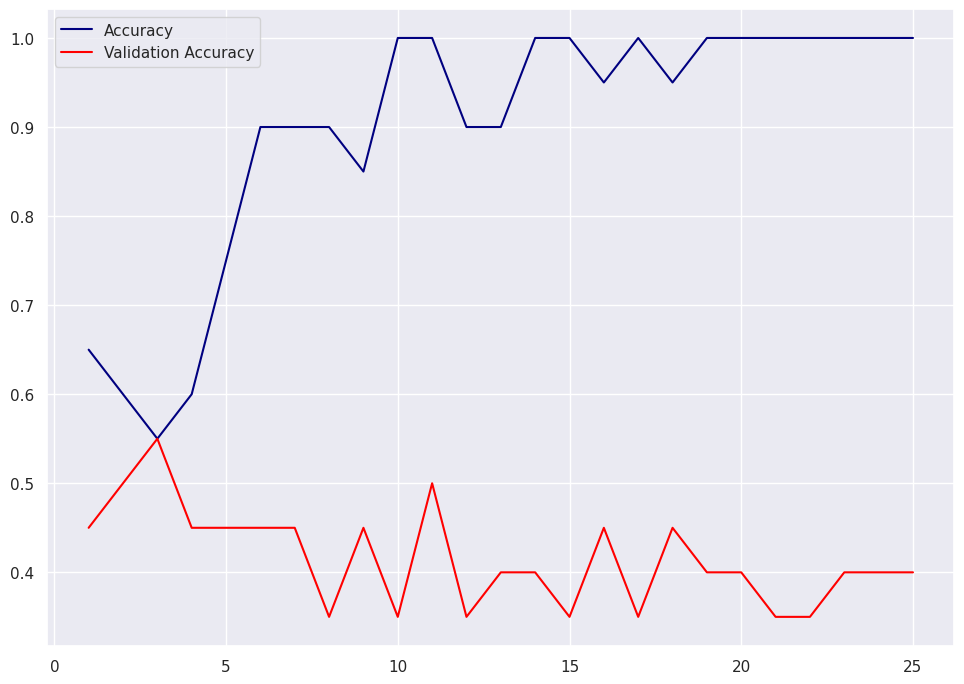

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1,len(history.history['accuracy'])+1,1),

         history.history['accuracy'],
         color='navy',
         label='Accuracy')
plt.plot(np.arange(1,len(history.history['accuracy'])+1,1),
         history.history['val_accuracy'],
         color='red',
         label='Validation Accuracy')

plt.legend()

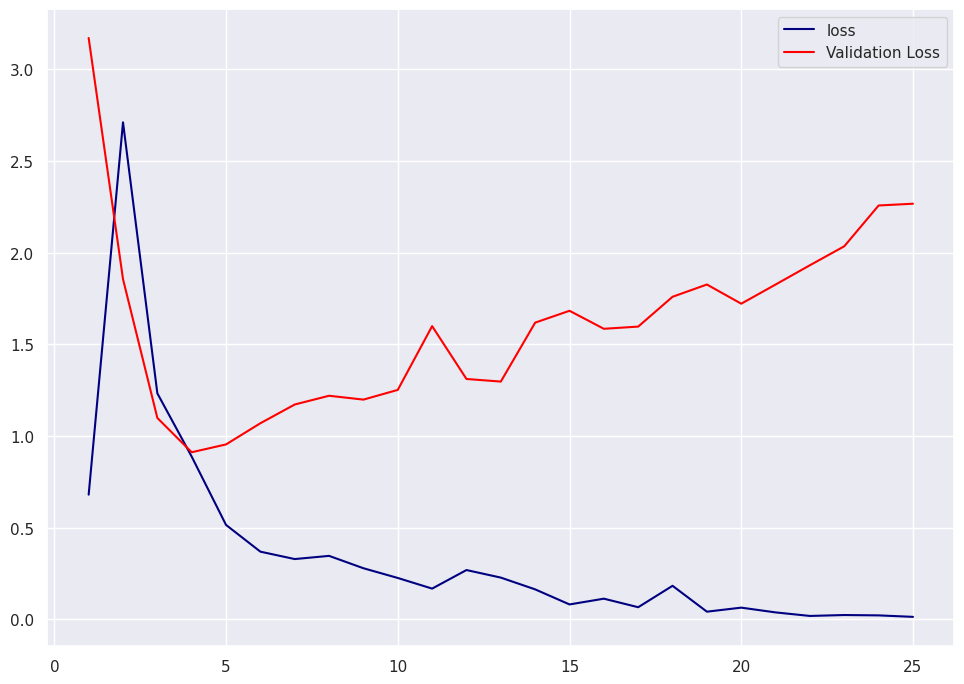

In [40]:
plt.plot(np.arange(1,len(history.history['loss'])+1,1),
         history.history['loss'],
         color='navy',
         label='loss')

plt.plot(np.arange(1,len(history.history['loss'])+1,1),
         history.history['val_loss'],
         color='red',
         label='Validation Loss')

plt.legend()